# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [10]:
data = pd.read_excel('geo.xlsx')

In [11]:
data.head()

,Unnamed: 0,x,y,comment_class
0,0,37.612416,55.777454,-1
1,1,37.612416,55.777454,-1
2,2,37.603298,55.742108,-1
3,3,37.558526,55.728758,-1
4,4,37.566431,55.731794,-1


In [39]:
# Разделяем город на районы с помощью Kmeans кластеризации

X = data[['x','y']]
clust = KMeans().fit_predict(X)

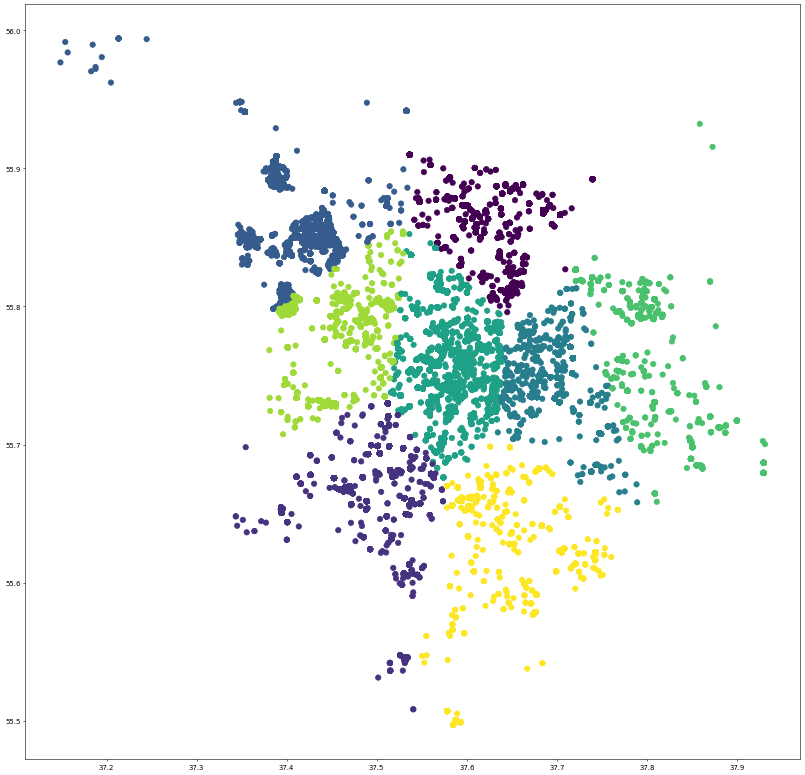

In [41]:
figure(figsize=(20, 20), dpi=50)
plt.scatter(data.x, data.y, c=clust, s=60)

In [48]:
data_pro = data[data['comment_class'] == 1][['x','y']]
data_ag =  data[data['comment_class'] == -1][['x','y']]

In [49]:
clust_pro = KMeans().fit_predict(data_pro)
clust_ag = KMeans().fit_predict(data_ag)

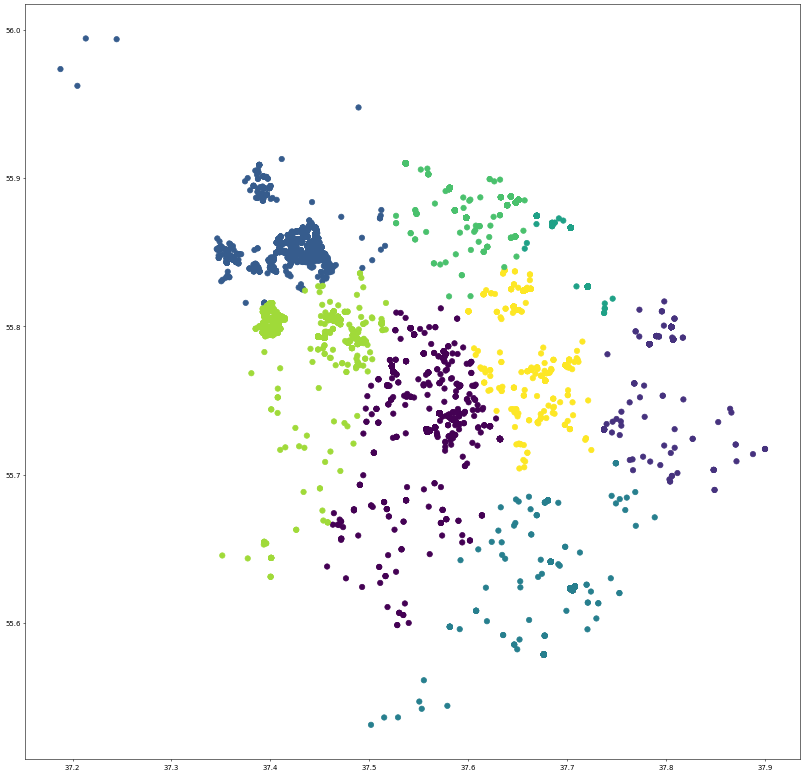

In [51]:
# Выделяем отдельно голосоа за 


figure(figsize=(20, 20), dpi=50)
plt.scatter(data_pro.x, data_pro.y, c=clust_pro, s=60)

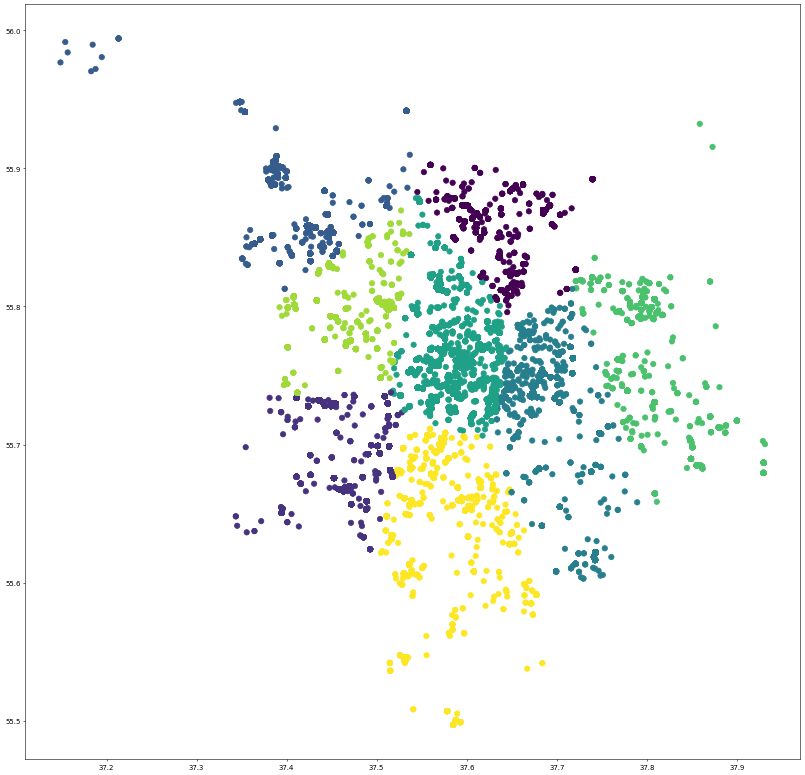

In [52]:
# Выделяем отдельно голосоа против

figure(figsize=(20, 20), dpi=50)
plt.scatter(data_ag.x, data_ag.y, c=clust_ag, s=60)

In [54]:
# Определяем оптимальное чилсо кластеров. 

k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X)
    k_inertia.append(clf_kmeans.inertia_)

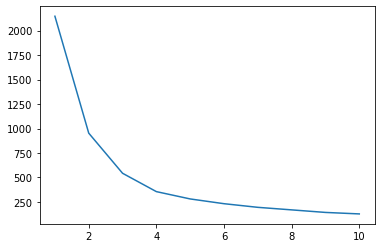

In [55]:
plt.plot(ks, k_inertia)

In [56]:
diff = np.diff(k_inertia)

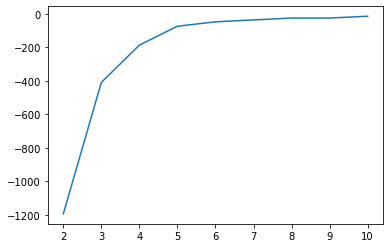

In [57]:
plt.plot(ks[1:], diff)

In [58]:
diff_r = diff[1:] / diff[:-1]

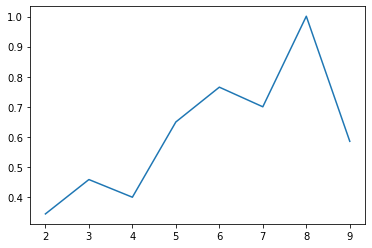

In [61]:
plt.plot(ks[1:-1], diff_r)

In [63]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

2

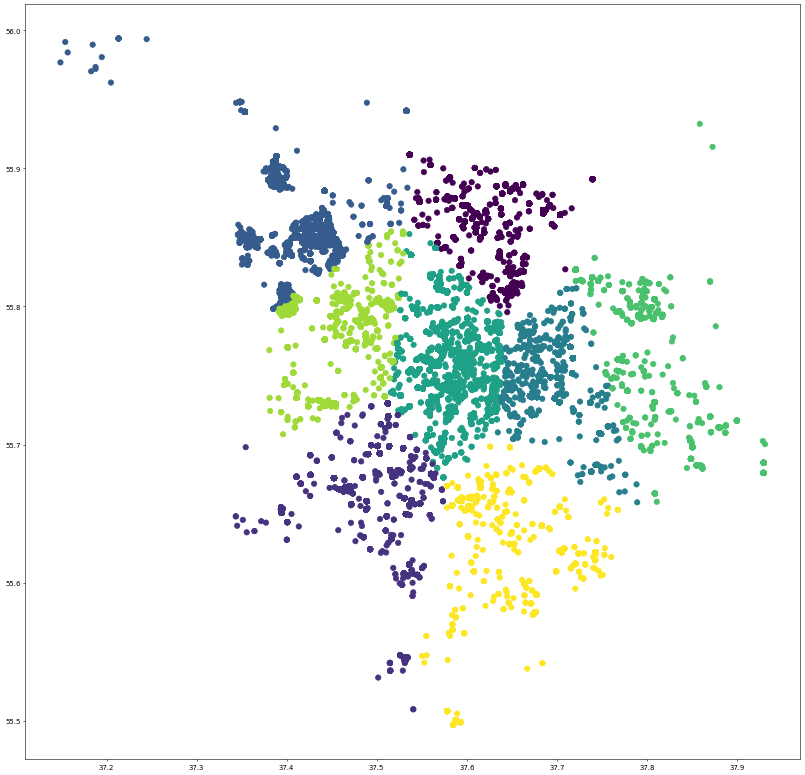

In [72]:
# Строим еще раз кластеры с учетом найденного оптимального значения

clust1 = KMeans(n_clusters=2).fit_predict(X)

figure(figsize=(20, 20), dpi=50)
plt.scatter(data.x, data.y, c=clust, s=60)

In [70]:
# Дополнительное задание не получилось сделать. DBSCAN выдает Memory Error

dbscan_clustering = DBSCAN(eps=0.5, min_samples=100, algorithm='ball_tree').fit(X)

figure(figsize=(20, 20), dpi=50)
plt.scatter(data.x, data.y, c=dbscan_clustering, s=60)

MemoryError: 